In [1]:
# TO DO: 
# Convert the network into a bipartite/pseudo-bipartite network, between importers on one side and exporters on the other
# Already doing this we would have done a lot of network analysis and shown off a lot
# Then also include a previous years' network and we can do a comparison between the two

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import glob

In [24]:
# Point to the 2022 BACI csv dataset
file_path = "/Users/zenrehda/Desktop/NAProject/BACI_HS22_Y2022_V202401b.csv"

In [25]:
import os

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File not found. Check the path.")


File exists!


In [26]:
# Our product code for historical artifacts, saved as a list if we want to include multiple product codes
product_codes = [970610]

In [27]:
# Read the CSV in chunks, ensuring the Multi-Index structure is preserved
filtered_data = pd.concat(
    chunk[chunk.index.get_level_values('k').isin(product_codes)] for chunk in pd.read_csv(
        file_path, chunksize=10000, index_col=[0, 1, 2, 3, 4, 5]  # Adjust this list to match your Multi-Index levels
    )
)

### The codes for each index:
't' = year

'i' = exporter

'j' = importer

'k' = product

'v' = value

'q' = quantity

In [6]:
# DO NOT RUN YET - Code is created to work on a MultiIndex, so we have 0 columns. If we want columns, reset index below

# We reset the index to make sure the columns work as intended, as pandas currently treats this as a MultiIndex (complicado, no me gusta)
#filtered_data = filtered_data.reset_index()

# This will give us the clearly defined columns
#print(filtered_data.columns)

In [29]:
filtered_data

Empty DataFrame
Columns: []
Index: [(2022, 4, 276, 970610, 1.759,         0.003), (2022, 4, 372, 970610, 36.632,         0.015), (2022, 4, 826, 970610, 33.359,         0.034), (2022, 4, 842, 970610, 3.823,         0.002), (2022, 8, 757, 970610, 2.589,         0.013), (2022, 12, 757, 970610, 14.555,         0.004), (2022, 24, 842, 970610, 367.979,         0.029), (2022, 31, 826, 970610, 24.165,         0.012), (2022, 31, 842, 970610, 214.325,         0.065), (2022, 32, 251, 970610, 3.313,         0.002), (2022, 32, 348, 970610, 0.192,            NA), (2022, 32, 842, 970610, 159.839,        40.315), (2022, 36, 246, 970610, 8.567,         0.002), (2022, 36, 276, 970610, 2.984,         0.002), (2022, 36, 372, 970610, 11.188,         0.004), (2022, 36, 380, 970610, 6.303,         0.014), (2022, 36, 528, 970610, 1.391,         0.022), (2022, 36, 554, 970610, 22.597,            NA), (2022, 36, 757, 970610, 1.732,         0.003), (2022, 36, 826, 970610, 519.759,         0.988), (2022, 36, 842, 970610, 46.462,         0.049), (2022, 40, 32, 970610, 8.951,         0.250), (2022, 40, 36, 970610, 62.233,         0.088), (2022, 40, 56, 970610, 2.92,         0.011), (2022, 40, 100, 970610, 0.398,         0.001), (2022, 40, 124, 970610, 72.395,         0.021), (2022, 40, 156, 970610, 233.325,         0.094), (2022, 40, 191, 970610, 1.885,         0.006), (2022, 40, 196, 970610, 1.237,         0.004), (2022, 40, 203, 970610, 7.702,         0.018), (2022, 40, 208, 970610, 1.531,         0.001), (2022, 40, 233, 970610, 0.31,         0.002), (2022, 40, 246, 970610, 0.2,         0.001), (2022, 40, 251, 970610, 125.54,         0.169), (2022, 40, 276, 970610, 83.202,         0.078), (2022, 40, 300, 970610, 1.869,         0.005), (2022, 40, 344, 970610, 1143.926,         1.112), (2022, 40, 348, 970610, 13.871,         0.026), (2022, 40, 372, 970610, 4.08,         0.011), (2022, 40, 376, 970610, 56.432,         0.002), (2022, 40, 380, 970610, 36.132,         0.045), (2022, 40, 392, 970610, 254.361,         0.031), (2022, 40, 410, 970610, 1.028,         0.004), (2022, 40, 440, 970610, 0.164,         0.001), (2022, 40, 442, 970610, 0.269,         0.001), (2022, 40, 490, 970610, 231.12,         0.066), (2022, 40, 528, 970610, 13.628,         0.022), (2022, 40, 579, 970610, 0.776,         0.009), (2022, 40, 616, 970610, 5.542,         0.020), (2022, 40, 620, 970610, 3.874,         0.011), (2022, 40, 642, 970610, 2.847,         0.011), (2022, 40, 643, 970610, 8.62,         0.006), (2022, 40, 699, 970610, 34.536,         0.095), (2022, 40, 703, 970610, 1.873,         0.008), (2022, 40, 705, 970610, 3.686,         0.004), (2022, 40, 724, 970610, 6.31,         0.018), (2022, 40, 752, 970610, 0.805,         0.003), (2022, 40, 757, 970610, 444.043,         0.719), (2022, 40, 792, 970610, 4.16,         0.001), (2022, 40, 826, 970610, 828.397,         0.351), (2022, 40, 842, 970610, 1571.229,         4.307), (2022, 48, 826, 970610, 3.817,         0.001), (2022, 51, 757, 970610, 31.668,         0.009), (2022, 51, 826, 970610, 362.431,         0.001), (2022, 56, 36, 970610, 146.088,         0.086), (2022, 56, 40, 970610, 3.159,         0.002), (2022, 56, 124, 970610, 39.857,         0.158), (2022, 56, 136, 970610, 1.895,         0.004), (2022, 56, 152, 970610, 0.181,         0.002), (2022, 56, 156, 970610, 1.363,         0.002), (2022, 56, 251, 970610, 506.858,         0.711), (2022, 56, 276, 970610, 129.552,         0.112), (2022, 56, 344, 970610, 105.425,         0.060), (2022, 56, 376, 970610, 48.595,         0.428), (2022, 56, 380, 970610, 80.096,         0.001), (2022, 56, 392, 970610, 49.251,         0.006), (2022, 56, 410, 970610, 11.427,         0.012), (2022, 56, 442, 970610, 0.16,         0.012), (2022, 56, 484, 970610, 2.582,         0.003), (2022, 56, 490, 970610, 3.218,         0.004), (2022, 56, 528, 970610, 3.834,         0.008), (2022, 56, 554, 970610, 1.264,         0.001), (2022, 56, 579, 970610, 1.085,         0.001), (2022, 56, 634, 970610, 24.

In [ ]:
# Create a dictionary to hold DataFrames for each unique `i`
datasets_by_exporter = {exporter: data for exporter, data in filtered_data.groupby(level='i')}


# Optionally, you can save each DataFrame to a CSV file if needed
for exporter, df in datasets_by_exporter.items():
    output_file = f"export_csv/dataset_for_exporter_{exporter}.csv"  # Modify the filename as needed
    df.to_csv(output_file)  # Save to CSV
    print(f"Saved dataset for exporter {exporter} to {output_file}")
    


In [30]:
import os

# Create a dictionary to hold DataFrames for each unique `i`
datasets_by_exporter = {exporter: data for exporter, data in filtered_data.groupby(level='i')}

# Create the output directory if it doesn't exist
output_dir = "export_csv"
os.makedirs(output_dir, exist_ok=True)  # Create the folder if it doesn't already exist

# Save each DataFrame to a CSV file
for exporter, df in datasets_by_exporter.items():
    output_file = os.path.join(output_dir, f"dataset_for_exporter_{exporter}.csv")  # Construct file path
    df.to_csv(output_file)  # Save to CSV
    print(f"Saved dataset for exporter {exporter} to {output_file}")


Saved dataset for exporter 4 to exporter_csv/dataset_for_exporter_4.csv
Saved dataset for exporter 8 to exporter_csv/dataset_for_exporter_8.csv
Saved dataset for exporter 12 to exporter_csv/dataset_for_exporter_12.csv
Saved dataset for exporter 24 to exporter_csv/dataset_for_exporter_24.csv
Saved dataset for exporter 31 to exporter_csv/dataset_for_exporter_31.csv
Saved dataset for exporter 32 to exporter_csv/dataset_for_exporter_32.csv
Saved dataset for exporter 36 to exporter_csv/dataset_for_exporter_36.csv
Saved dataset for exporter 40 to exporter_csv/dataset_for_exporter_40.csv
Saved dataset for exporter 48 to exporter_csv/dataset_for_exporter_48.csv
Saved dataset for exporter 51 to exporter_csv/dataset_for_exporter_51.csv
Saved dataset for exporter 56 to exporter_csv/dataset_for_exporter_56.csv
Saved dataset for exporter 68 to exporter_csv/dataset_for_exporter_68.csv
Saved dataset for exporter 76 to exporter_csv/dataset_for_exporter_76.csv
Saved dataset for exporter 100 to exporter

In [31]:
import os

# Create a dictionary to hold DataFrames for each unique `i`
datasets_by_importer = {importer: data for importer, data in filtered_data.groupby(level='j')}

# Create the output directory if it doesn't exist
output_dir_import = "import_csv"
os.makedirs(output_dir_import, exist_ok=True)  # Create the folder if it doesn't already exist

# Save each DataFrame to a CSV file
for importer, df in datasets_by_importer.items():
    output_file_import = os.path.join(output_dir_import, f"dataset_for_importer_{importer}.csv")  # Construct file path
    df.to_csv(output_file_import)  # Save to CSV
    print(f"Saved dataset for importer {importer} to {output_file_import}")


Saved dataset for importer 8 to importer_csv/dataset_for_importer_8.csv
Saved dataset for importer 20 to importer_csv/dataset_for_importer_20.csv
Saved dataset for importer 31 to importer_csv/dataset_for_importer_31.csv
Saved dataset for importer 32 to importer_csv/dataset_for_importer_32.csv
Saved dataset for importer 36 to importer_csv/dataset_for_importer_36.csv
Saved dataset for importer 40 to importer_csv/dataset_for_importer_40.csv
Saved dataset for importer 48 to importer_csv/dataset_for_importer_48.csv
Saved dataset for importer 51 to importer_csv/dataset_for_importer_51.csv
Saved dataset for importer 56 to importer_csv/dataset_for_importer_56.csv
Saved dataset for importer 60 to importer_csv/dataset_for_importer_60.csv
Saved dataset for importer 76 to importer_csv/dataset_for_importer_76.csv
Saved dataset for importer 92 to importer_csv/dataset_for_importer_92.csv
Saved dataset for importer 100 to importer_csv/dataset_for_importer_100.csv
Saved dataset for importer 104 to impo

In [32]:
unique_exporters = filtered_data.index.get_level_values('i').unique()
print(f"Index of unique exporters: {unique_exporters}")

unique_importers = filtered_data.index.get_level_values('j').unique()
print(f'Index of unique importers: {unique_importers}')

Index of unique exporters: Index([  4,   8,  12,  24,  31,  32,  36,  40,  48,  51,
       ...
       795, 804, 818, 826, 842, 858, 860, 862, 887, 894],
      dtype='int64', name='i', length=110)
Index of unique importers: Index([276, 372, 826, 842, 757, 251, 348, 246, 380, 528, 554,  32,  36,  56,
       100, 124, 156, 191, 196, 203, 208, 233, 300, 344, 376, 392, 410, 440,
       442, 490, 579, 616, 620, 642, 643, 699, 703, 705, 724, 752, 792,  40,
       136, 152, 484, 634, 702, 764, 784, 470, 591, 116, 422, 446, 458, 586,
       710,  20,  76, 320, 360, 414, 504, 512, 682, 704, 268, 804, 352, 516,
       188, 368,  92, 428,   8,  31,  48,  60, 104, 292, 400, 496, 558, 585,
       688, 800, 860, 887,  51, 214, 462, 524, 533, 566, 604],
      dtype='int64', name='j')


In [33]:
# Our number of nodes / number of exporting countries: 110
print(len(unique_exporters))
print(len(unique_importers))

110
95


In [37]:
# Path to the folder containing the CSV files for each exporter
path_to_csvs = "export_csv/*.csv"  # Adjust this path as needed

# Create a dictionary to store combined quantities for each importer
combined_quantities = {}

# Load each CSV file and aggregate the quantities
for file in glob.glob(path_to_csvs):
    df = pd.read_csv(file, index_col=[0, 1, 2])  # Assuming Multi-Index (t, i, j)

    # Ensure 'q' is numeric and coerce errors to NaN
    df['q'] = pd.to_numeric(df['q'], errors='coerce')

    # Group by importer (j) and sum the quantities (q)
    quantities_by_importer = df.groupby(level='j')['q'].sum()  # NA values will be ignored by default

    # Combine results
    for importer, quantity in quantities_by_importer.items():
        if pd.isna(quantity):  # Check for NaN
            quantity = 0  # Treat NaN as 0 for aggregation

        if importer in combined_quantities:
            combined_quantities[importer] += quantity
        else:
            combined_quantities[importer] = quantity

# Convert combined_quantities dictionary to DataFrame for better visualization
combined_quantities_df = pd.DataFrame.from_dict(combined_quantities, orient='index', columns=['Total Quantity'])
combined_quantities_df.reset_index(inplace=True)
combined_quantities_df.rename(columns={'index': 'Importer'}, inplace=True)

# Sort the DataFrame by the 'Importer' (country code) column
combined_quantities_df.sort_values(by='Importer', inplace=True)

# Display the combined quantities for each importer
print(combined_quantities_df)

# Save the combined quantities to a CSV file if needed
combined_quantities_df.to_csv("combined_quantities_by_importer.csv", index=False)

    Importer  Total Quantity
70         8           0.006
2         20           0.080
71        31           0.001
69        32           0.541
3         36          22.733
..       ...             ...
85       804           0.079
1        826         146.720
55       842         879.566
86       860           0.096
87       887           0.005

[95 rows x 2 columns]


In [38]:
# Path to the folder containing the CSV files for each exporter
path_to_csvs = "export_csv/*.csv"  # Adjust this path as needed

# Initialize a directed graph
G = nx.DiGraph()

# Load each CSV file and create edges for the directed graph
for file in glob.glob(path_to_csvs):
    # Read the CSV file
    df = pd.read_csv(file, index_col=[0, 1, 2])  # Assuming Multi-Index (t, i, j)
    
    # Ensure 'q' is numeric and coerce errors to NaN
    df['q'] = pd.to_numeric(df['q'], errors='coerce')

    # Iterate over each row and add edges to the graph
    for (t, exporter, importer), group in df.groupby(level=[0, 1, 2]):
        total_quantity = group['q'].sum(skipna=True)  # Sum quantities for the current exporter-importer pair
        if pd.notna(total_quantity):  # Ensure total_quantity is not NaN
            G.add_edge(exporter, importer, weight=total_quantity)

# Optional: You can visualize or analyze the graph now
print("Nodes in the graph:", G.number_of_nodes())
print("Edges in the graph:", G.number_of_edges())

# Optional: To save the graph to a file (e.g., GML format)
#nx.write_gml(G, "export_import_graph.gml")

Nodes in the graph: 126
Edges in the graph: 952


In [42]:
def counting_degrees_diGraph(graph):
    '''
    A function that counts the total number of in and out degrees for each key value. Returns two lists of tuples.
    
        Input:
    graph = Your nx.diGraph
    
        Output:
    out_degree_list = A list of tuples, with the first value corresponding to the degree and the second value to nodes with
    said degree in the network. e.g (0, 25) -> 25 nodes have an outdegree 0
    in_degree_list = Same as above.
    '''
    out_degree = list(graph.out_degree)
    out_degree.sort()
    in_degree = list(graph.in_degree)
    in_degree.sort()

    
    out_degree_totals = []
    out_degree_counts = {}
    out_degree_list = []
    for i in out_degree:
        out_degree_totals.append(i[1])
    for i in out_degree_totals:
        out_degree_counts[i] = out_degree_totals.count(i)
    for key in out_degree_counts:
        out_degree_list.append((key, out_degree_counts[key]))
        
        
    # ADDED CODE TO ADD 0 FREQUENCY COUNTS, UP TO HIGHEST VALUE
    out_degree_list.sort()

    min_out_degree = out_degree_list[0][0]  # Get the minimum degree value
    max_out_degree = out_degree_list[-1][0]  # Get the maximum degree value

    # Loop over the range from min to max, adding missing values with count 0
    for degree in range(min_out_degree, max_out_degree + 1):
        if degree not in out_degree_counts:
            out_degree_list.append((degree, 0))
        
        
        
    in_degree_totals = []
    in_degree_counts = {}
    in_degree_list = []
    for i in in_degree:
        in_degree_totals.append(i[1])
    for i in in_degree_totals:
        in_degree_counts[i] = in_degree_totals.count(i)
    for key in in_degree_counts:
        in_degree_list.append((key, in_degree_counts[key]))
        
        
        
    # ADDED CODE TO ADD 0 FREQUENCY COUNTS, UP TO HIGHEST VALUE
    out_degree_list.sort()

    min_in_degree = in_degree_list[0][0]  # Get the minimum degree value
    max_in_degree = in_degree_list[-1][0]  # Get the maximum degree value

    # Loop over the range from min to max, adding missing values with count 0
    for degree in range(min_in_degree, max_in_degree + 1):
        if degree not in in_degree_counts:
            in_degree_list.append((degree, 0))
    
             
    out_degree_list.sort()
    in_degree_list.sort()
        
    return out_degree_list, in_degree_list


def cumulative_degree_plot(degree_list):
    '''
    To be expanded - A simple plot function for creating a cumulative degree plot
    
        Input:
    A degree list of tuples, as created by counting_degree_diGraph()
    
        Output:
    A plt.plot created from the two values in the tuples.
    '''
    degree_index_list = []
    degree_value_list = []
    degree_cumul_list = []
    
    for i in degree_list:
        degree_index_list.append(i[0])
        degree_value_list.append(i[1])
        
    for i in range(len(degree_index_list)):
        degree_cumul_list.append(np.sum(degree_value_list[i:]))
    
    
    list1 = []
    list2 = []
    
    for i in range(len(degree_list)):
        list1.append(degree_list[i][0])
        list2.append(degree_list[i][1])
       
    plt.xscale("log")
    plt.yscale("log")
        
    return plt.plot(degree_index_list, degree_cumul_list)


def closeness_centrality(graph):
    '''
    Small function for finding the node centrality of our network. Returns a sorted list of tuples and the highest value node.
    
    Input:
        graph = A networkx graph
        
    Output:
        node_centrality_tuples = A sorted list of tuples for each of the nodes, with their degree centrality.
        maxtup = A tuple for the highest value node.
    '''
    node_centrality = nx.degree_centrality(graph)
    node_centrality_tuples = sorted(node_centrality.items())
    maxtup = (0,0)


    for i in node_centrality_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
    
    return node_centrality_tuples, maxtup

def average_neighbor_degree(graph):
    '''
    Small function for finding the average degree of the neighbors to each node in the graph. Good for finding hubs.
    
    Input:
        graph = A networkx graph
        
    Output:
        avg_neighbor_degree_tuples = A sorted list of tuples for each of the nodes, with their average neighbor degree.
        maxdic = A dictionary of the highest value nodes.
        
        OPTIONAL maxtup = A tuple for the highest value node.
    '''
    
    average_neighbor_degree_dict = nx.average_neighbor_degree(graph)
    
    avg_neighbor_degree_tuples = sorted(average_neighbor_degree_dict.items())
    maxtup = (0,0)
    maxdic = {}
    
    for i in avg_neighbor_degree_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
            
    for i in avg_neighbor_degree_tuples:
        if i[1] == maxtup[1]:
            maxdic[i[0]] = i[1]
            
    return avg_neighbor_degree_tuples, maxdic #, maxtup

def betweenness_centrality(graph):
    '''
    Small function for finding the betweenness centrality - 
    Betweenness centrality is a measure used in network analysis to quantify the importance of a node within a graph 
    based on the number of shortest paths that pass through it. 
    It reflects how much a node acts as a bridge or mediator in the network.
    
    Input:
        graph = A networkx graph
    
    Output:
        betw_cen_tuples = A sorted list of tuples for each of the nodes, with their betweenness centrality.
        maxtup = A tuple for the highest value node.
    
    '''
    
    betw_cen = nx.betweenness_centrality(graph)
    
    betw_cen_tuples = sorted(betw_cen.items())
    maxtup = (0,0)
    
    for i in betw_cen_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
    
    return betw_cen_tuples, maxtup


def clustering_coefficient(graph):
    '''
    Small function for finding the clustering coefficient
    
    Input:
        graph = A networkx graph
        
    Output:
        clust_co_tuples = A sorted list of tuples for each of the nodes, with their clustering coefficient
        maxdic = A dictionary for the highest value nodes
        
        OPTIONAL maxtup = A tuple for the maximum value. Logically not sound, as many nodes will share clustering coefficients.
    '''
    
    clust_co = nx.clustering(graph)
    
    clust_co_tuples = sorted(clust_co.items())
    
    maxtup = (0,0)
    maxdic = {}
    
    for i in clust_co_tuples:
        if i[1] > maxtup[1]:
            maxtup = i
            
    for i in clust_co_tuples:
        if i[1] == maxtup[1]:
            maxdic[i[0]] = i[1]
            
    return clust_co_tuples, maxdic #, maxtup

def maximum_shortest_path(graph):
    '''
    As we have a weakly connected graph, we can not directly find the diameter of our graph.
    Instead we must find the longest path within any two connected nodes in the network.
    
    Input:
        graph = A networkx graph
        
    Output:
        diameter = An integer that shows the longest path between two connected nodes.
        
    '''
    diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(graph)]) # maximum distance of a list containing the shortest paths between any two nodes in the graph (computed with Dijkstra's algorithm)
    
    # If you want to understand how the code works/runs, use the following:
    #for (i, j) in nx.shortest_path_length(graph):
    #    print(f'this is i: {i}')
    #    print(f'this is j: {j.values()}')
    
    # TO BE ADDED
    # Save the i-country to understand which nodes have the longest path.
    
    return diameter


In [40]:
out_degree_count, in_degree_count = counting_degrees_diGraph(G)

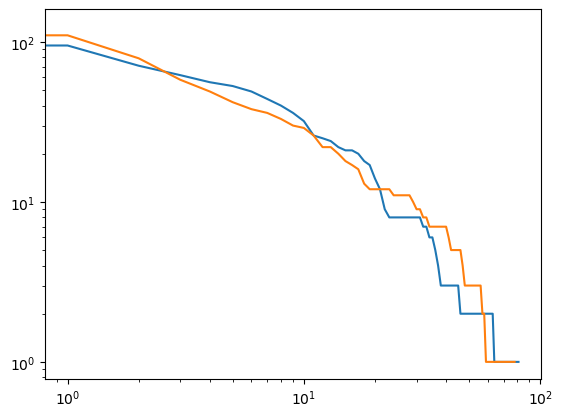

In [43]:
# Cumulative degree plots (DO WE HAVE A POWER LAW? (no))

cumulative_degree_plot(in_degree_count) # Blue
cumulative_degree_plot(out_degree_count) # Orange

In [44]:
# Is our graph weakly connected?
nx.is_weakly_connected(G)

True

In [45]:
# We can save the different connected subnetworks as generator sets of nodes.
component_test = nx.weakly_connected_components(G)

# Our largest connected network can be found like this - Right now it returns all 126 nodes?? How come
largest_cc = max(nx.weakly_connected_components(G), key=len)
len(largest_cc)

126

In [46]:
# Node degree centrality
node_centrality_tuple_list, max_node_centrality = closeness_centrality(G)
avg_neighbor_deg_tuple, max_avg_neighbor_deg = average_neighbor_degree(G)
between_centr_tuple, max_between_centr = betweenness_centrality(G)
clust_coe_tup, maxdic_clust = clustering_coefficient(G)
longest_path = maximum_shortest_path(G)

print(f'Our maximum node centrality is: {max_node_centrality}')
print()
print(f'Our maximum average neighbor degree nodes are: {list(max_avg_neighbor_deg.keys())} and they have value {list(max_avg_neighbor_deg.values())[0]}')
print()
print(f'Our maximum betweenness centrality node is: {max_between_centr}')
print()
print(f'Our maximum clustering coefficient nodes are: {list(maxdic_clust.keys())} and they have value {list(maxdic_clust.values())[0]}')
print()
print(f'Our longest path in the network is: {longest_path}')

Our maximum node centrality is: (826, 1.1280000000000001)

Our maximum average neighbor degree nodes are: [48, 466, 516, 682, 740, 762, 804] and they have value 78.0

Our maximum betweenness centrality node is: (826, 0.23241688323755533)

Our maximum clustering coefficient nodes are: [8, 31, 32, 51, 60, 68, 100, 116, 136, 144, 180, 188, 214, 231, 233, 268, 352, 400, 422, 434, 440, 504, 524, 608, 642, 682, 688, 705, 760, 795, 804, 858, 860, 887] and they have value 1.0

Our longest path in the network is: 4


In [47]:
list(max_avg_neighbor_deg.values())[0]

78.0

In [48]:
# average_degree_connectivity - Measures the average degree of nodes that have a specific degree

nx.average_degree_connectivity(G)

{2: 72.46428571428571,
 76: 16.986842105263158,
 5: 36.56666666666667,
 141: 11.645390070921986,
 89: 17.865168539325843,
 1: 72.53571428571429,
 40: 16.05,
 60: 24.641666666666666,
 48: 26.760416666666668,
 14: 30.785714285714285,
 10: 30.88,
 52: 20.76923076923077,
 54: 24.25925925925926,
 8: 27.875,
 13: 39.26373626373626,
 31: 25.50537634408602,
 26: 31.76923076923077,
 15: 30.08,
 84: 18.357142857142858,
 16: 41.375,
 3: 67.15384615384616,
 39: 25.076923076923077,
 32: 21.25,
 30: 28.5,
 7: 23.952380952380953,
 6: 58.666666666666664,
 11: 28.863636363636363,
 82: 18.597560975609756,
 27: 32.51851851851852,
 23: 12.956521739130435,
 41: 27.24390243902439,
 21: 38.42857142857143,
 139: 10.877697841726619,
 17: 38.294117647058826,
 4: 52.75,
 24: 33.0}

In [49]:
# Clustering codes: https://networkx.org/documentation/stable/reference/algorithms/clustering.html

nx.transitivity(G)

0.3097573379831444

In [52]:
# Creating a list of our country nodes 126 long

country_code_list = []

for i in G:
    country_code_list.append(i)
    
country_code_list.sort()
print(country_code_list)

[4, 8, 12, 20, 24, 31, 32, 36, 40, 48, 51, 56, 60, 68, 76, 92, 100, 104, 116, 120, 124, 136, 144, 152, 156, 170, 180, 188, 191, 196, 203, 208, 214, 231, 233, 246, 251, 258, 268, 276, 292, 300, 320, 344, 348, 352, 360, 364, 368, 372, 376, 380, 388, 392, 400, 404, 410, 414, 418, 422, 428, 434, 440, 442, 446, 450, 458, 462, 466, 470, 484, 490, 496, 504, 512, 516, 524, 528, 533, 554, 558, 562, 566, 579, 585, 586, 591, 598, 604, 608, 616, 620, 634, 642, 643, 682, 688, 694, 699, 702, 703, 704, 705, 710, 724, 740, 752, 757, 760, 762, 764, 776, 784, 788, 792, 795, 800, 804, 818, 826, 842, 858, 860, 862, 887, 894]


In [ ]:
# THINGS WE SHOULD FIND:
# Degree distribution (DONE!)
# Average path length - Diameter
# Closeness Centrality
# Clustering Coefficient

## Summing up our findings so far:

Out of the 126 countries participating in the trade in historical artifacts in 2022, only 95 of them are importers of these same products.

There are 952 connections between these countries.

In [60]:
# Accessing our dictionary values. We should perhaps clean up edges below a certain weight

for n, nbrsdict in G.adjacency():
    print(f'Now we are in node {n}')
    for nbr, eattr in nbrsdict.items():
        #print(eattr.items())
        temp = [v for k, v in eattr.items() if v > 0.1]
        if temp:
            temp.append(n)
        print(nbrsdict.values())

Now we are in node 8
dict_values([{'weight': 0.013}])
Now we are in node 757
dict_values([{'weight': 0.004}, {'weight': 0.56}, {'weight': 0.825}, {'weight': 0.001}, {'weight': 0.002}, {'weight': 0.1}, {'weight': 0.08}, {'weight': 0.002}, {'weight': 0.008}, {'weight': 1.537}, {'weight': 2.257}, {'weight': 0.147}, {'weight': 0.002}, {'weight': 0.306}, {'weight': 0.0}, {'weight': 0.808}, {'weight': 0.014}, {'weight': 0.002}, {'weight': 0.0}, {'weight': 0.002}, {'weight': 0.004}, {'weight': 0.001}, {'weight': 0.043}, {'weight': 0.03}, {'weight': 0.001}, {'weight': 0.065}, {'weight': 0.0}, {'weight': 0.139}, {'weight': 0.015}, {'weight': 1.29}, {'weight': 2.203}])
dict_values([{'weight': 0.004}, {'weight': 0.56}, {'weight': 0.825}, {'weight': 0.001}, {'weight': 0.002}, {'weight': 0.1}, {'weight': 0.08}, {'weight': 0.002}, {'weight': 0.008}, {'weight': 1.537}, {'weight': 2.257}, {'weight': 0.147}, {'weight': 0.002}, {'weight': 0.306}, {'weight': 0.0}, {'weight': 0.808}, {'weight': 0.014}, {'

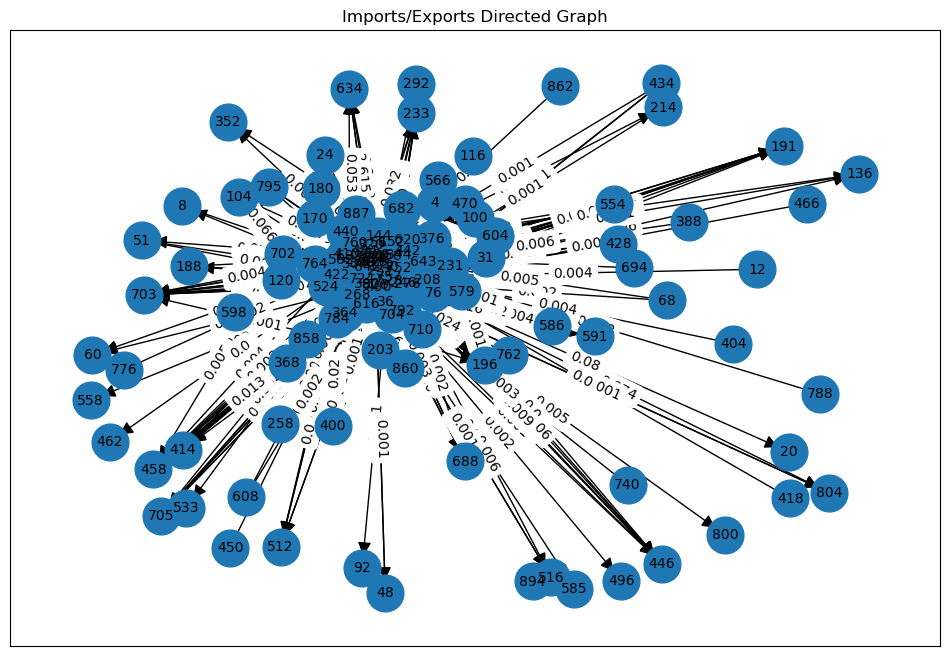

In [61]:
# Draw the graph (this may not work well for very large graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Imports/Exports Directed Graph")
plt.show()